# Data Salaries Analysis

## Summary

This project involves analyzing salary data for data-related roles. The analysis aims to provide insights into average salaries per year, difference between the average salary (in USD) of Data Scientists and Data Engineers, and the number of full-time employees who works 100% remotely.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

In [3]:
import pandas as pd
salaries_df = pd.read_csv('salaries.csv')
salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
57189,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
57190,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
57191,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
57192,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


<hr/>
<h2>Dataset Overview: Total Records and Year Range</h2>

In [5]:
# Group by work years
annual_record = salaries_df.groupby('work_year').agg(num_records = ('work_year', 'count'))
# Number of years
year_count = annual_record.shape[0]
years = annual_record.index[:]

# Add total record at the last row
total_record = annual_record.sum()
annual_record.loc['Total'] = total_record

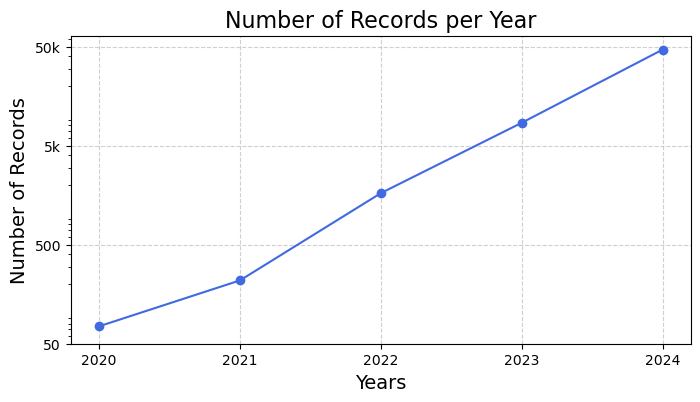

In [6]:
import matplotlib.pyplot as plt

# Exclude the 'Total' row from the plot
annual_record_excl_total = annual_record.drop('Total')

# Set figure size
plt.figure(figsize=(8, 4))

# Plot the number of records per year
plt.plot(annual_record_excl_total, marker='o', linestyle='-', color='royalblue')

# Add title and labels
plt.title('Number of Records per Year', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Customize x and y ticks
plt.xticks([2020, 2021, 2022, 2023, 2024])
plt.yticks([50, 500, 5000, 50000], ['50', '500', '5k', '50k'])

# Add grid with custom style
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

In [7]:
# Display answer
print(f'There are {total_record.values[0]:,} records in the dataset, and it covered {year_count} years: {", ".join(map(str, years))}')

# Display table
annual_record

There are 57,194 records in the dataset, and it covered 5 years: 2020, 2021, 2022, 2023, 2024


,num_records
work_year,
2020,75
2021,218
2022,1659
2023,8522
2024,46720
Total,57194


<hr/>
<h2>Average Salary (USD) Comparison: Data Scientists vs. Data Engineers</h2>

In [9]:
# Average salary for Data Scientists
ds_salary = salaries_df[salaries_df['job_title'] == 'Data Scientist']
avg_ds_salary = ds_salary['salary'].mean()

# Average salary for Data Engineers
de_salary = salaries_df[salaries_df['job_title'] == 'Data Engineer']
avg_de_salary = de_salary['salary'].mean()

# --Average salary per year
# Calculate the median salary for Data Scientists per year
avg_ds_salary_per_year = ds_salary.groupby('work_year').agg(avg_de_salary = ('salary', 'median'))

# Calculate the median salary for Data Engineers per year
avg_de_salary_per_year = de_salary.groupby('work_year').agg(avg_de_salary = ('salary', 'median'))

In [10]:
# Role that earns more
print(f'Average salary of Data Scientists: {round(avg_ds_salary, 2)} USD')
print(f'Average salary of Data Engineers: {round(avg_de_salary, 2)} USD')

role = "Data Scientists" if avg_ds_salary > avg_de_salary else "Data Engineers"
print(f'\n{role} earns more salary.')

Average salary of Data Scientists: 170120.14 USD
Average salary of Data Engineers: 150544.93 USD

Data Scientists earns more salary.


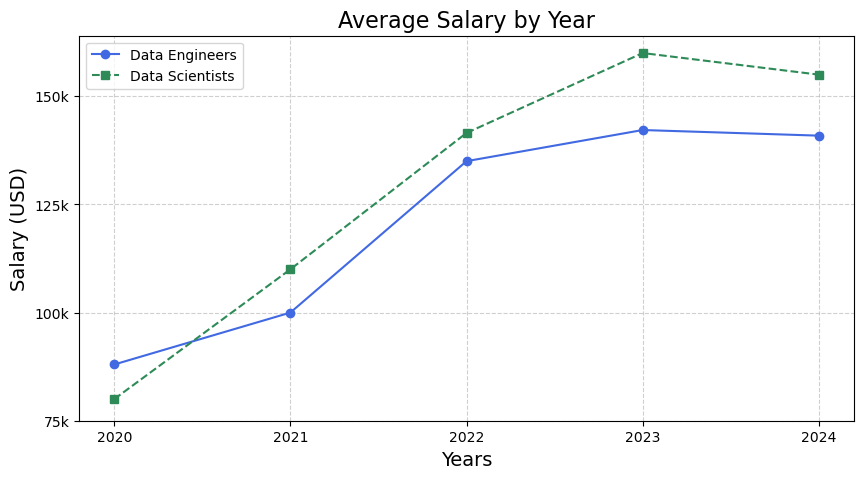

In [11]:
# Visualize the average salary of Data Engineers and Data Scientists
# Set figure size
plt.figure(figsize=(10, 5))

# Plot for Data Engineers
plt.plot(avg_de_salary_per_year, label='Data Engineers', marker='o', linestyle='-', color='royalblue')

# Plot for Data Scientists
plt.plot(avg_ds_salary_per_year, label='Data Scientists', marker='s', linestyle='--', color='seagreen')

# Title and labels
plt.title('Average Salary by Year', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)

# Customizing ticks
plt.xticks([2020, 2021, 2022, 2023, 2024])
plt.yticks([75000, 100000, 125000, 150000], ['75k', '100k', '125k', '150k'])

# Adding grid
plt.grid(True, linestyle='--', alpha=0.6)

# Adding legend
plt.legend(fontsize=10)

# Show plot
plt.show()

In [12]:
avg_de_salary_per_year

,avg_de_salary
work_year,
2020,88000.0
2021,100000.0
2022,135000.0
2023,142200.0
2024,140900.0


<hr/>
<h2>US-based Full-time Employees Who Work 100% Remotely</h2>

In [14]:
# Filter the DataFrame for full-time employees based in the US who work 100% remotely
ft_us_remote = salaries_df[(salaries_df['employment_type'] == 'FT') &  # if full-time employee
                         (salaries_df['company_location'] == 'US') &   # if US-based
                         (salaries_df['remote_ratio'] == 100)]         # if 100% remote

# Count the number of such employees
num_ft_us_remote = ft_us_remote.shape[0]

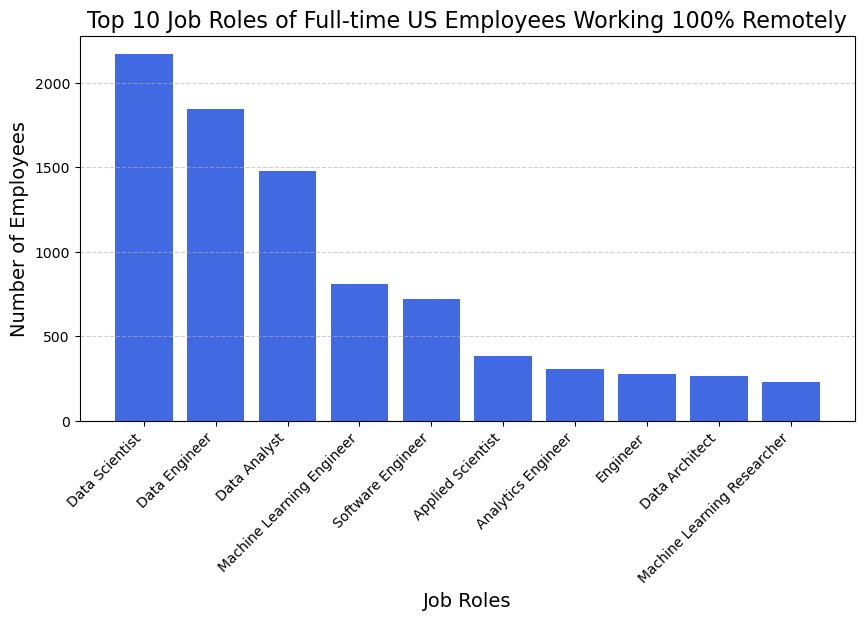

Total count of full-time employees in the US working entirely remotely: 11,160 employees

Here are the top 10 job roles of full-time US employees working 100% remotely.


,job_title,num_of_employees
0,Data Scientist,2171
1,Data Engineer,1848
2,Data Analyst,1481
3,Machine Learning Engineer,807
4,Software Engineer,718
5,Applied Scientist,383
6,Analytics Engineer,307
7,Engineer,274
8,Data Architect,265
9,Machine Learning Researcher,228


In [32]:
# Count the number of employees in each job title, then get the top 10
num_per_jobtitle = ft_us_remote['job_title'].value_counts().head(10)

# Visualize the top 10 job titles with US-based full-time employees that works 100% remotely
# Set figure size
plt.figure(figsize=(10, 5))

# Plot the number of employees by job role with the use of bar graph
plt.bar(num_per_jobtitle.index, num_per_jobtitle.values, color='royalblue')

# Title and labels
plt.title('Top 10 Job Roles of Full-time US Employees Working 100% Remotely', fontsize=16)
plt.xlabel('Job Roles', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.show()

# Display the answer
print(f"Total count of full-time employees in the US working entirely remotely: {num_ft_us_remote:,} employees")

# Show DataFrame
print("\nHere are the top 10 job roles of full-time US employees working 100% remotely.")
num_per_jobtitle.reset_index().rename(columns={'count': 'num_of_employees'})
